<a href="https://colab.research.google.com/github/ShivamGupta82/DAV_Lab/blob/master/DAV_Exp02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM: Simple Linear Regression in Python and R

## Simple Linear Regression in Python [Dateset Link](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv)

### 1. Loading Data

In [ ]:
import pandas as pd

housing_rent = pd.read_csv('/content/House_Rent_Dataset.csv')
housing_rent

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
housing_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
housing_rent.describe

<bound method NDFrame.describe of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelo

In [ ]:
X = housing_rent.drop('Rent', axis=1)
X

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
Y = housing_rent['Rent']
Y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [ ]:
print(X.shape)
print(Y.shape)

(4746, 11)
(4746,)


###2. Checking normality of dependent variable

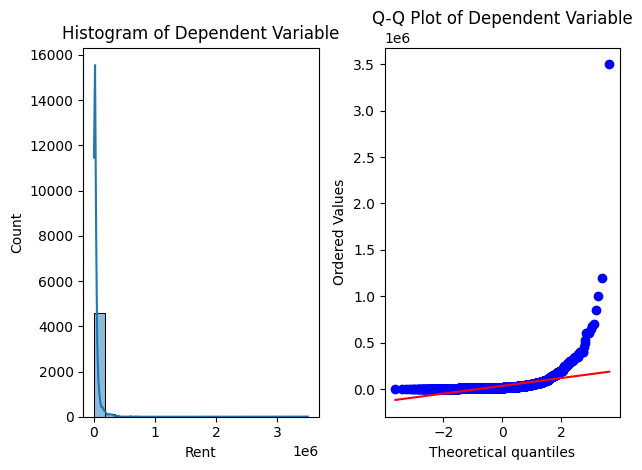

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
plt.subplot(1, 2, 1)
sns.histplot(Y, bins=20, kde=True)
plt.title('Histogram of Dependent Variable')
plt.subplot(1, 2, 2)
probplot(Y, plot=plt)
plt.title('Q-Q Plot of Dependent Variable')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
Y_transformed = np.log1p(Y)

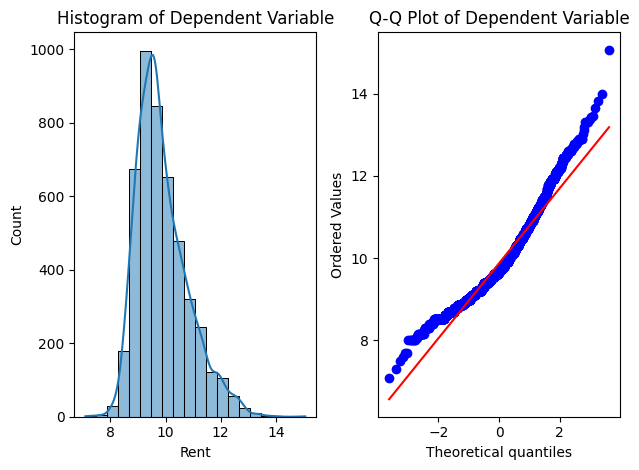

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
plt.subplot(1, 2, 1)
sns.histplot(Y_transformed, bins=20, kde=True)
plt.title('Histogram of Dependent Variable')
plt.subplot(1, 2, 2)
probplot(Y_transformed, plot=plt)
plt.title('Q-Q Plot of Dependent Variable')

plt.tight_layout()
plt.show()

###3. Checking linearity between independent and dependent variable

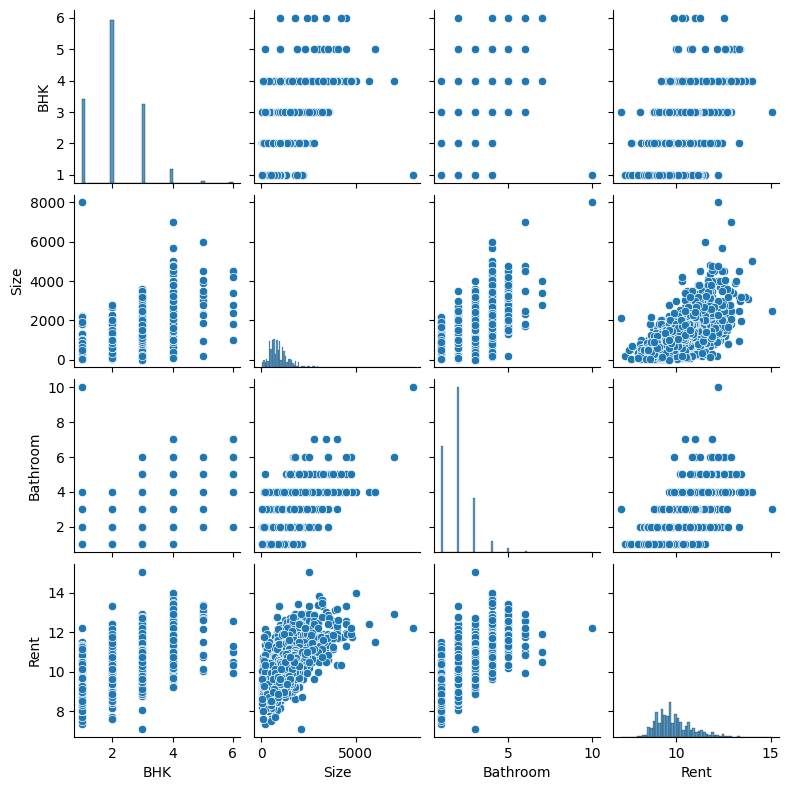

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data_for_pairplot = pd.concat([X, Y_transformed], axis=1)
sns.pairplot(data_for_pairplot, height=2)
plt.show()

Selecting size attribute as it has more linearity with our dependent variable

In [ ]:
X1 = np.array(housing_rent['Size'])

In [ ]:
X1 = X1.reshape(-1,1)

In [ ]:
X1.shape

(4746, 1)

###4. Model Training using linear regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y_transformed, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5782627557079233
R-squared: 0.32947642849210157


###5. Graphical representation

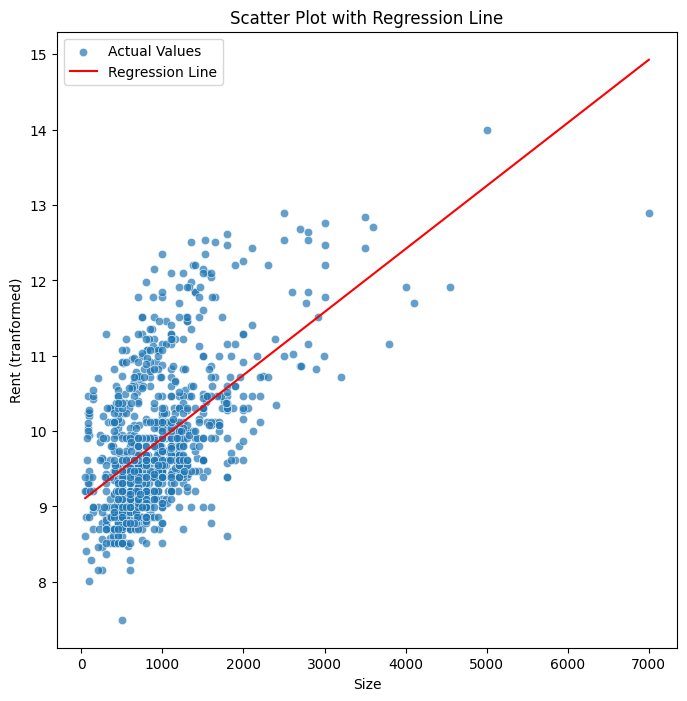

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_column = X_test[:, 0]
plt.figure(figsize=(8, 8))
sns.scatterplot(x=x_column, y=Y_test, label='Actual Values', alpha=0.7)
sns.lineplot(x=x_column, y=Y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Rent (tranformed)')
plt.legend()
plt.show()

In [ ]:
Y_pred_transformed = model.predict([[2000]])
Y_pred_ = np.expm1(Y_pred_transformed)
Y_pred_transformed
print(Y_pred_)

[46343.56978921]


## Simple Linear Regression in R [Dataset](https://www.kaggle.com/code/pranjalpandey12/performing-simple-linear-regression-in-r/input)

### 1. Loading the Dataset

In [ ]:
data = read.csv("/content/Salary_Data.csv",header = T )

In [ ]:
data

YearsExperience,Salary
<dbl>,<dbl>
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445


In [16]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 2. Checking normality of dependent variable

In [28]:
install.packages(c("tidyverse", "caret", "MASS", "lmtest", "olsrr", "broom"))
# Load the installed packages
library(tidyverse)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)
library(broom)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘zoo’, ‘car’, ‘goftest’, ‘gridExtra’, ‘nortest’, ‘Rcpp’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

  

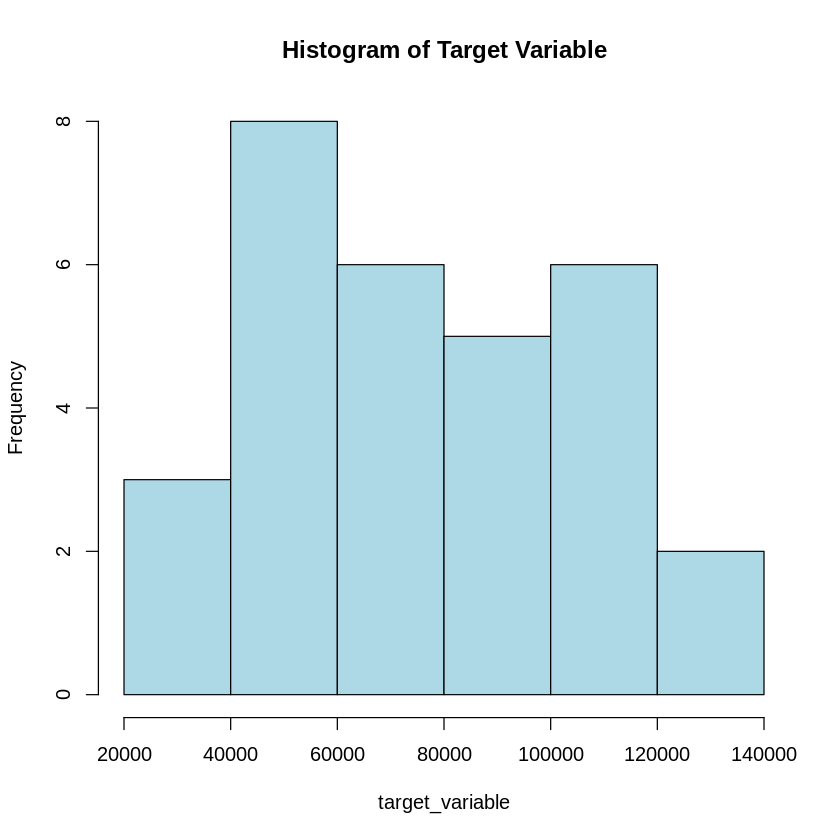

In [40]:
target_variable <- data$Salary <- as.numeric(as.character(data$Salary[!is.na(data$Salary)]))
hist(target_variable,main = "Histogram of Target Variable", col = "lightblue", border = "black")

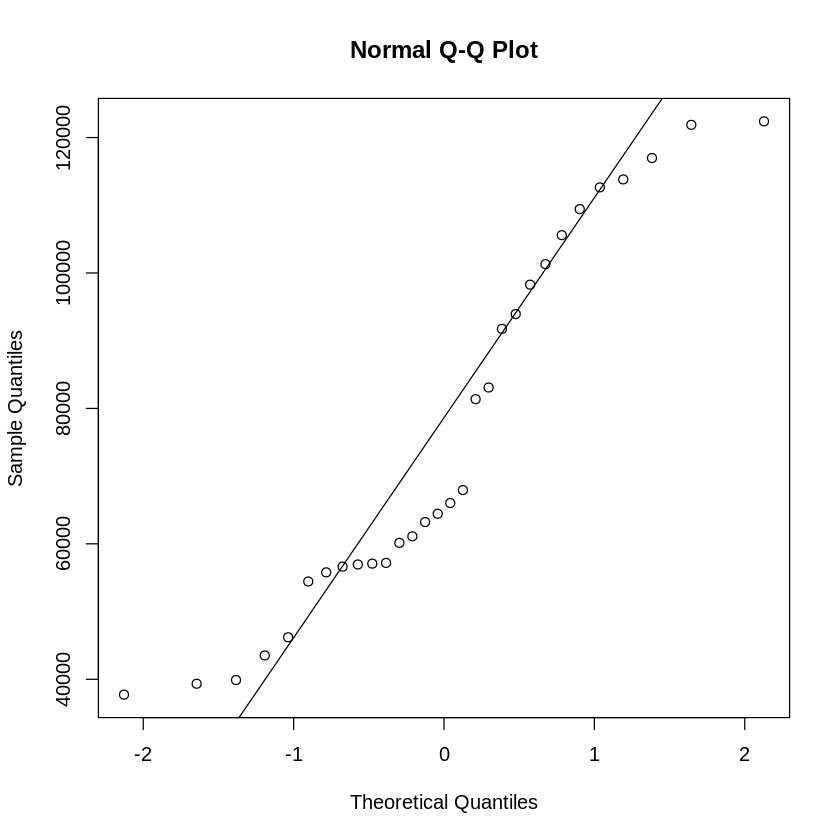

In [43]:
data$Salary <- as.numeric(as.character(data$Salary[!is.na(data$Salary)]))
qqnorm(data$Salary)
qqline(data$Salary)

In [44]:
shapiro.test(data$Salary)


	Shapiro-Wilk normality test

data:  data$Salary
W = 0.91032, p-value = 0.01516


###3. Checking Linearity between dependent and independent

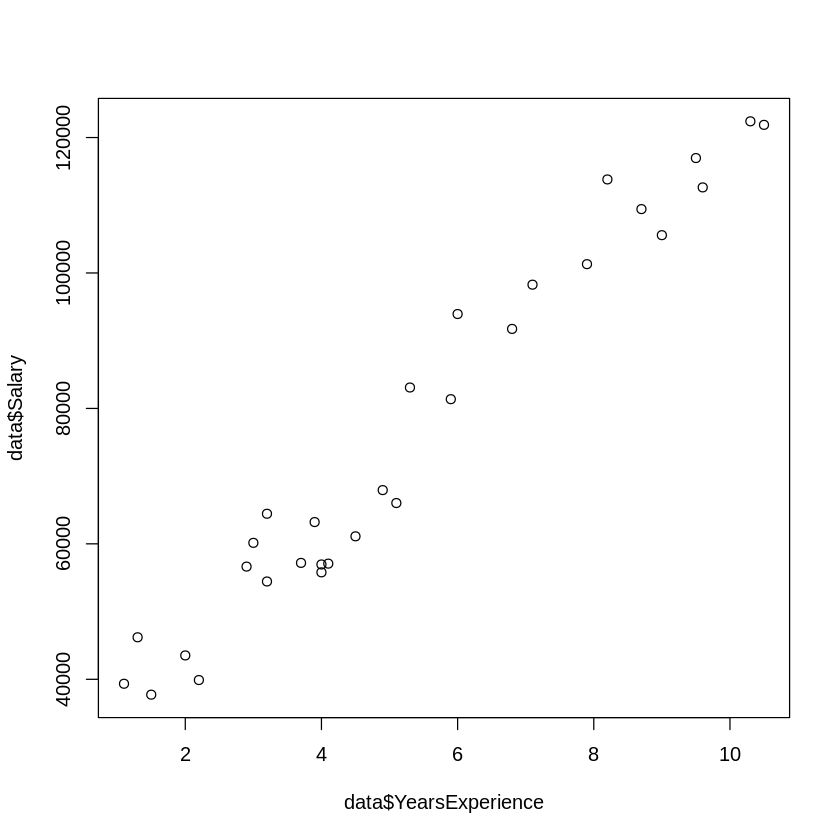

In [17]:
plot(data$YearsExperience,data$Salary)

In [18]:
cor.test(data$YearsExperience , data$Salary)


	Pearson's product-moment correlation

data:  data$YearsExperience and data$Salary
t = 24.95, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9542949 0.9897078
sample estimates:
      cor 
0.9782416 


Since, p-value is less than 0.05 and sample correlation is 0.9782416. Hence, High significant correlation (Highly Linearly Related) exists in the population.

### 4. Model Training using linear regression model

In [45]:
set.seed(123)
training.samples <- data$Salary %>%
  createDataPartition(p = 0.6, list = FALSE)
train.data  <- data[training.samples, ]
test.data <- data[-training.samples, ]


# Fit model

model <- lm(Salary ~ YearsExperience , data = train.data)

summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7774  -3692   -907   3990   8096 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        27474       2802   9.804 1.21e-08 ***
YearsExperience     9024        472  19.117 2.10e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5582 on 18 degrees of freedom
Multiple R-squared:  0.9531,	Adjusted R-squared:  0.9504 
F-statistic: 365.4 on 1 and 18 DF,  p-value: 2.098e-13



	Shapiro-Wilk normality test

data:  model$residuals
W = 0.92283, p-value = 0.1123


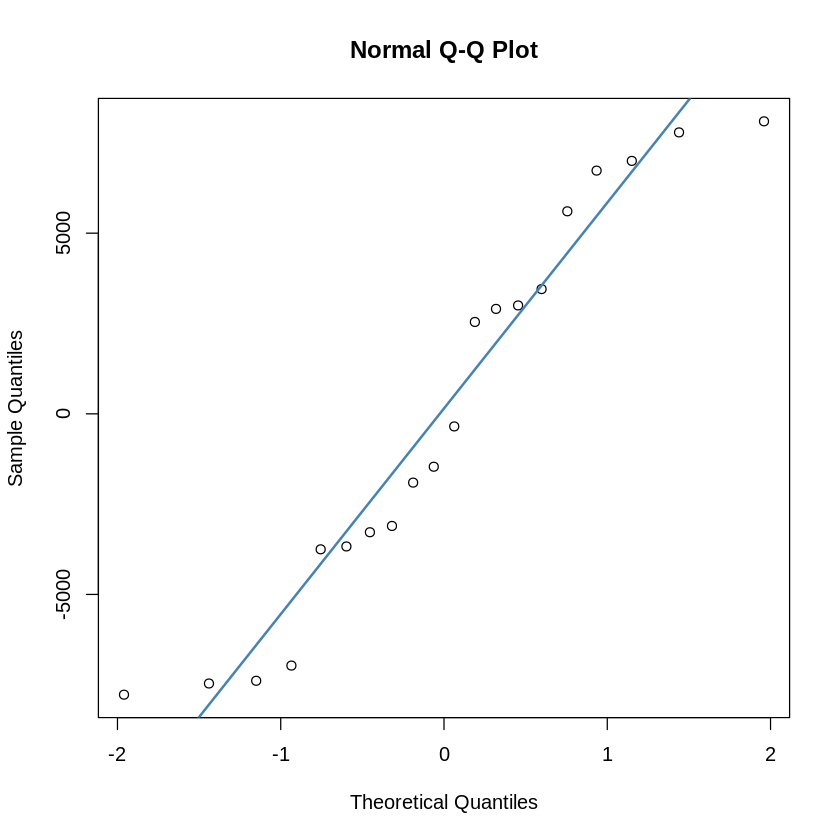

In [46]:
qqnorm(model$residuals)
qqline(model$residuals , col = "steelblue", lwd = 2)

# Statistical Test
shapiro.test(model$residuals)

### 5. Graphical representation

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9701604,6556.616,4960.324


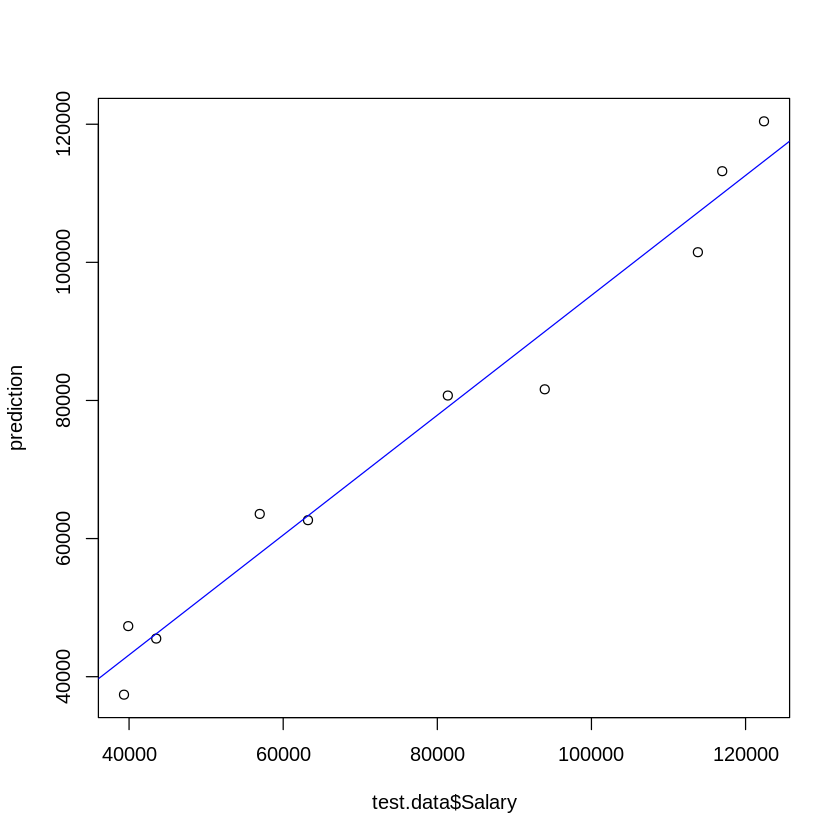

In [47]:
# Making prediction
prediction <- model %>% predict(test.data)

# Visualization
plot(test.data$Salary , prediction)
abline(lm(prediction ~ Salary, data = test.data), col = "blue")

# Statistical Measure
data.frame( R2 = R2(prediction, test.data$Salary),
            RMSE = RMSE(prediction, test.data$Salary),
            MAE = MAE(prediction, test.data$Salary))

On an average, This Simple Linear Regression Model captures 95.29 % variability available in the target (Salary). That is, 95.29 % variability in Salary is due to the predictor "YearsExperience".

## Conclusion

Therefore, we have successfully implemented simple linear regression in python as well as in R.